# Hui-Segmentation and Targeting

In [ ]:
import numpy as np

import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt

family = pd.read_csv("family_segments.csv")

family = family.drop(columns=['hhold_ID'])
family = family.drop(columns=['dis_plus_sub'])


family.head()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,7525,7825,1,0,2,9.0,826.0,2309.0,4094.0,701
1,639815,449775,1,1,2,11.0,1779.0,9060.0,8670.0,764
2,288847,204750,1,6,3,13.0,2121.0,6436.0,5021.0,720
3,191791,136730,1,1,1,8.0,1880.0,13107.0,66074.0,783
4,96527,72165,0,3,0,NaN,775.0,2042.0,2846.0,757


The above code brought the data into the environment and I dropped ID column.

In [ ]:
print(" \nCount total NaN in a DataFrame : \n\n",
       family.isnull().sum().sum())
family.isnull().sum()


 
Count total NaN in a DataFrame : 

 526


est_net_worth           0
est_inc                 0
domestic                0
number_visits           0
number_children         0
oldest_child_age      526
online_merch_avg        0
est_annual_travel       0
est_annual_leisure      0
est_hhold_FICO          0
dtype: int64

The above code detect if the dataset contains NA value. From the output data frame we can observe that the NA value exists in the column oldest_child_age. 

In [ ]:
family['oldest_child_age'].fillna(0, inplace=True)
family.isnull().sum()

est_net_worth         0
est_inc               0
domestic              0
number_visits         0
number_children       0
oldest_child_age      0
online_merch_avg      0
est_annual_travel     0
est_annual_leisure    0
est_hhold_FICO        0
dtype: int64

In [ ]:
family.head()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,7525,7825,1,0,2,9.0,0,826.0,2309.0,4094.0,701
1,639815,449775,1,1,2,11.0,0,1779.0,9060.0,8670.0,764
2,288847,204750,1,6,3,13.0,1,2121.0,6436.0,5021.0,720
3,191791,136730,1,1,1,8.0,1,1880.0,13107.0,66074.0,783
4,96527,72165,0,3,0,0.0,0,775.0,2042.0,2846.0,757


Now I have replaced the column that contains NA value with the 0, because the NA value occurs whenever the family do not have a child. It doesn't contain missing values now.

In [ ]:

result = family.dtypes
print(result)

est_net_worth           int64
est_inc                 int64
domestic                int64
number_visits           int64
number_children         int64
oldest_child_age      float64
online_merch_avg      float64
est_annual_travel     float64
est_annual_leisure    float64
est_hhold_FICO          int64
dtype: object


In the above code, I checked the datatype pf each column.

I standardized the dataset because there are different units in this dataset.



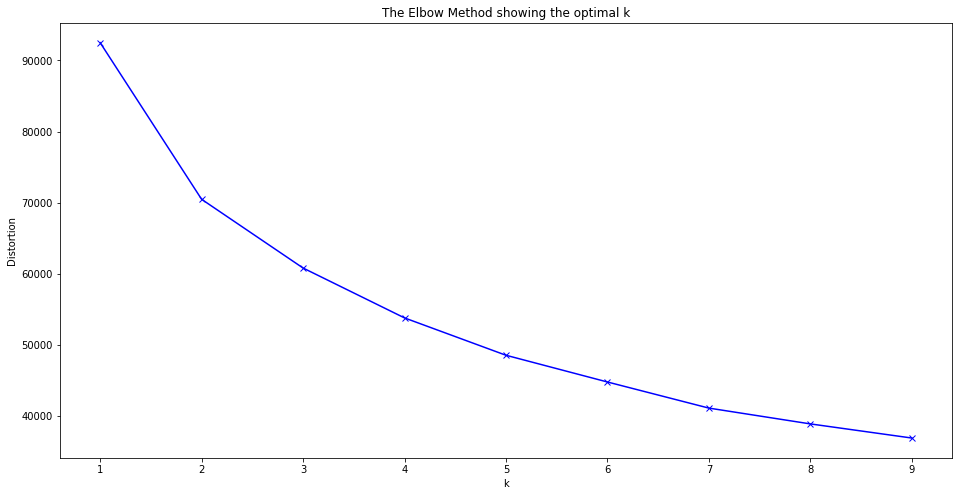

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Using the standardized dataframe, I found the optimal k for from the elbow method. From the picture we can see that the best k is around 4.

In [ ]:
import scipy.stats as stats

kmeanModel = KMeans(n_clusters=4)
kmeans=kmeanModel.fit_predict(df)
kmeanModel.fit_predict(df)

df=pd.DataFrame(kmeans)
family['cluster']=df
family
family.groupby(['cluster']).describe()

est_net_worth                                                   \
                count          mean           std      min         25%   
cluster                                                                  
0              3624.0  6.773990e+05  5.224770e+05    763.0   281466.00   
1              4338.0  5.565739e+04  4.626314e+04     51.0    15956.25   
2               799.0  4.186013e+06  2.169053e+06  10836.0  2494311.50   
3               489.0  3.940012e+05  6.346302e+05    583.0    37325.00   

                                          est_inc                ...  \
               50%         75%        max   count          mean  ...   
cluster                                                          ...   
0         503827.0   931059.75  4673946.0  3624.0  5.420195e+05  ...   
1          43211.5    86840.00   338681.0  4338.0  4.198722e+04  ...   
2        3577475.0  5557648.50  9883250.0   799.0  2.642408e+06  ...   
3         131998.0   457405.00  7316784.0   489.0  2.948114e+05  ...   

        est_annual_leisure          est_hhold_FICO                         \
                       75%      max          count        mean        std   
cluster                                                                     
0                 12801.50  67247.0         3624.0  749.830298  25.243351   
1                  3039.75  53766.0         4338.0  750.440295  25.416780   
2                 51085.50  74805.0          799.0  749.443054  24.756538   
3                  7054.00  66074.0          489.0  753.472393  25.931731   

                                            
           min    25%    50%    75%    max  
cluster                                     
0        667.0  733.0  750.0  767.0  847.0  
1        655.0  733.0  750.0  768.0  835.0  
2        674.0  732.0  749.0  766.0  841.0  
3        677.0  735.0  753.0  773.0  832.0  

[4 rows x 80 columns]

## Cluster 0: [Huge family]

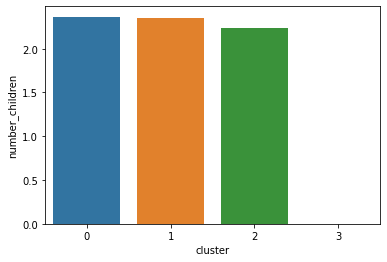

In [ ]:
sns.barplot(x='cluster',y='number_children',ci=None,data=family)

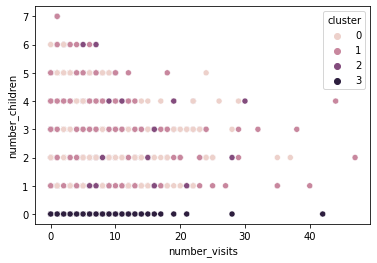

In [ ]:
sns.scatterplot(data=family,x='number_visits',y='number_children',hue='cluster')

From the above scatterplot and barplot, I discover that cluster 0 is the cluster with most kids numbers, and the least time of visitings. Therefore, I name this family: Huge family.
The marketing strategy for this type of family is to provide fast pass and special services for family that has equal or more than 4 kids.

## Cluster 1 [Not a travel fan]

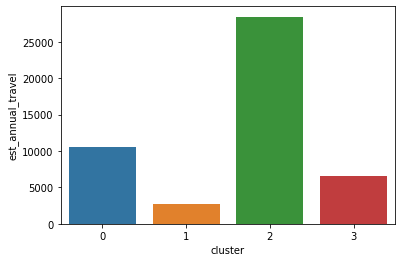

In [ ]:
sns.barplot(x='cluster',y='est_annual_travel',ci=None,data=family)

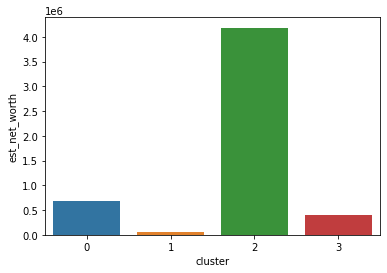

In [ ]:
sns.barplot(x='cluster',y='est_net_worth',ci=None,data=family)

For cluster 1, they have the lowest net worth, and the lowest estimating annual travel spend. I would name them: Not a travel fan.
Their other characteristics including: have less leisure time, oldest kids age higher, do not like to spend online. 
However, cluster 1 has the highest number of people. Therefore, for the marketing strategy for them, I would suggest to promote low price on off-line advertisements, such as TV commercial and billboards. Create exciting seasonal or holidy shows to attract more of these group of families.

## Cluster 2: [Big spenders]

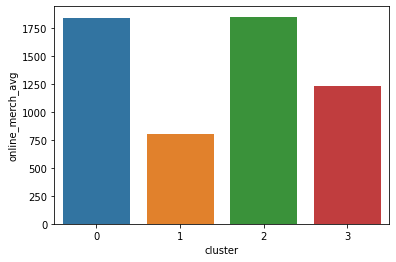

In [ ]:
import seaborn as sns
sns.barplot(x='cluster',y='online_merch_avg',ci=None,data=family)

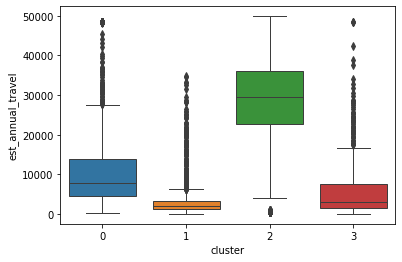

In [ ]:
sns.boxplot(data=family,x='cluster',y='est_annual_travel',linewidth=1)

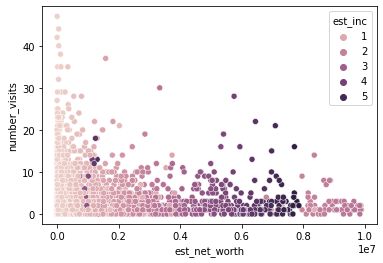

In [ ]:
sns.scatterplot(data=family,x='est_net_worth',y='number_visits',hue='est_inc')

The families in cluster 2 are the highest net worth and highest annual spending on travel. Even though they are not the ones visiting the park the most, they like to spend a lot on the online merchandise. 
Therefore, I name them: The big spenders.
For The "big spenders", I suggest the digital marketing strategy, directing their clicks to the online store. Such as making on social media of the online products, or sending email campaigns for these families to see the newest products.

## Cluster 3: [Romance Couple]

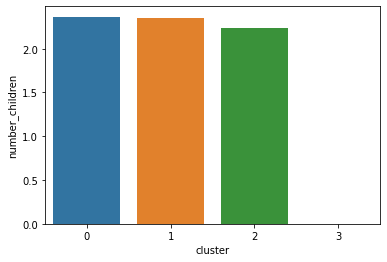

In [ ]:
sns.barplot(x='cluster',y='number_children',ci=None,data=family)

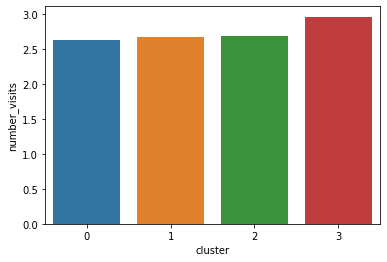

In [ ]:
sns.barplot(x='cluster',y='number_visits',ci=None,data=family)

For cluster 3, they are the families with 0 kids. I found that they have the highest number of visits, so I name them the Romance Couples. They also have characters that they have lowest income. Therefore, I believe they are younger couples that loves to have fun together.
My suggestion of their marketing strategy is to provide annual passes to attract them with a preferential price, and changing quarterly themes to encourage them to have multiple visits.


## Conclusion for Segmentation and Targeting:
For the families that comes to Disney park, there are four different marketing segmentations. The first is called Huge Family. They have most number of kids, and the least time of visitings. The marketing strategy for this type of family is to provide fast pass and special services for family that has equal or more than 4 kids. 

The second kind of family is called Not a travel fan. They have the lowest net worth, and the lowest estimating annual travel spend. Their other characteristics including: have less leisure time, oldest kids age higher, do not like to spend online. Therefore, for the marketing strategy for them is to promote low price on off-line advertisements, such as TV commercial and billboards. Create exciting seasonal or holidy shows to attract more of these group of families.

The next family is called The big spenders. They are the highest net worth and highest annual spending on travel. Even though they are not the ones visiting the park the most, they like to spend a lot on the online merchandise. The marketing strategy for The "big spenders"is digital marketing strategy, directing their clicks to the online store. Such as making on social media of the online products, or sending email campaigns for these families to see the newest products.

Finally, families with no kids is called Romance Couples. They have the lowest income and the highest number of visitsis. Therefore, I believe they are younger couples that loves to have fun together. Their marketing strategy is to provide annual passes to attract them with a preferential price, and changing quarterly themes to encourage them to have multiple visits.


# Zeping-Conjoint Analysis

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
amenity = pd.read_csv("hotel_amenities.csv")
amenity.head(5)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Bell - Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv(r'C:\Users\teejb\Documents\cruise_returners.csv')

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['hhold_ID'], axis=1, inplace=True)

In [ ]:
df.oldest_child_age.describe()

In [ ]:
df.groupby('return_1065').oldest_child_age.mean()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='return_1065',y='oldest_child_age',data=df,palette='winter');

In [ ]:
def impute_oldest_child_age(cols):
    oldest_child_age = cols[0]
    return_1065 = cols[1]
    
    if pd.isnull(oldest_child_age):
        
        if return_1065 == 1:
            return 9
        else:
            return 10
    else: 
            return oldest_child_age

In [ ]:
df['oldest_child_age'] = df[['oldest_child_age','return_1065']].apply(impute_oldest_child_age,axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='return_1065',y='cruise_theme',data=df,palette='winter');

In [ ]:
df['cruise_theme']=df['cruise_theme'].str.replace('starwars','Star Wars')

In [ ]:
df['cruise_theme']=df['cruise_theme'].str.replace('prin_fro','Princess/Frozen')

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='return_1065',y='cruise_theme',data=df,palette='winter');

In [ ]:
df[['cruise_theme']] = df[['cruise_theme']].fillna('Star Wars')

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df = pd.get_dummies(df, columns=['cabin_type', 'season_of_year', 'cruise_theme', 'embark_port'])

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split
X=df[['discount_original', 'coupon_received', 'est_inc', 'ticket_spend',
       'incidental_spending', 'park_package', 'res_to_port', 'number_children',
       'oldest_child_age', 'dis_plus_sub','cabin_type_Concierge', 'cabin_type_Inside', 'cabin_type_Oceanview',
       'cabin_type_Verandah', 'season_of_year_Fall', 'season_of_year_Spring',
       'season_of_year_Summer', 'season_of_year_Winter', 'cruise_theme_Marvel',
       'cruise_theme_Princess/Frozen', 'cruise_theme_Star Wars',
       'embark_port_Barcelona', 'embark_port_Copenhagen',
       'embark_port_New York', 'embark_port_Port Canaveral',
       'embark_port_San Diego', 'embark_port_Vancouver']]
y=df['return_1065']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=654)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

In [ ]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_,X_train)))
feature_imp_df.columns = ['feature importance' , 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b =plt.ylim()
a += 0.5
b -= 0.5
plt.ylim(a,b)
plt.show()

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,predictions))

In [ ]:
print(metrics.classification_report(y_test, predictions))

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6, 8],
    'max_features':[4, 8, 12, 16, 20],
    'min_samples_leaf':[2, 4, 6, 10],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

In [ ]:
clf=RandomForestClassifier(n_estimators=150, max_depth=8, max_features=12, min_samples_leaf=2, random_state=654)
clf.fit(X_train,y_train)

In [ ]:
predictions = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

In [ ]:
print(metrics.classification_report(y_test, predictions))

In [ ]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_,X_train)))
feature_imp_df.columns = ['feature importance' , 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b =plt.ylim()
a += 0.5
b -= 0.5
plt.ylim(a,b)
plt.show()

In [ ]:
predictions = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

In [ ]:
print(metrics.classification_report(y_test, predictions))

The Disney Cruise line is an important business unit for Disney and gathering data is crucial to understand customer preference as well as factors that contribute to their decisions to book an additional Disney Cruise in the future. Given the data set of cruise_returners.csv we were able to take this data and build a random forest tree model to determine whether a household would purchase tickets for a follow up trip. There were a few clean up steps needed to ensure the model can run correctly without any issues. Two of the data points, oldest child age and cruise theme, contained some blank values so these were updated to reflect the average age for returners and non-returners for the oldest child and for the cruise theme an assumption was made that the missing themes were to be replaced with Star Wars. Once the data was cleansed the model was run and was able to predict the purchase tickets for a follow up trip with an accuracy rate of 67%. When factoring in both potential outcomes, booking a return trip or not booking a return trip the balanced accuracy score came in at a similar 67%. In addition to the accuracy scores the model also produced a precision rate of 71%, recall rate of 68% and specificity rate of 66%. These additional metrics are useful, but false positives and negatives do not have an outsized importance. To help illustrate what is driving the model we looked at the feature importance for each of the data points provided in the data set. The feature importance represents the effect that a particular feature has on the model used and, in our case, it is the importance of the data points provided to predict if a household would be purchasing a follow up trip. In this model there were five data points that had the most importance. Number of Children, Discount Original, Res_to_port, park_package and oldest child age. The feature importance for these ranged from 0.129563 for number of children to 0.111128 for oldest child age. This is telling us the number of children a household has the largest effect on this model. This makes sense given the more children a family has the more the trip is going to cost. If a family has a lot of children, they may potentially book a return cruise, but it might be done years apart from each other. If the household only has one child, they may return every year until their child grows out of the Disney age. You can look at the oldest child age as well in this context. It also has a high effect on the model and logically that makes sense. Once children hit a certain age it is unlikely that parents would necessarily spend money on a Disney Cruise for them. If they are part of a larger family, this may not be the case, but if it’s a smaller family, it may not make sense financially to bring the eldest child along or look for better alternatives in the Disney universe. Overall, the model was successful in being able to predict households who plan on buying tickets for a return trip. Once we were able to see the feature importance of each of the data points the model can be manipulated to remove the features that do not have much of an effect on the model. In going through this process, we can then fine tune the accuracy of the model.

# AB Testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import scipy.stats as stats
from scipy.stats import chisquare

In [ ]:
popcorn = pd.read_csv('popcorn_buckets.csv')

NameError: ignored

Is there a significance between popcorn buckets and popcorn sales?

In [ ]:
popcorn.head()

NameError: ignored

In [ ]:
popcorn.describe()

In [ ]:
popcorn.info()

In [ ]:
df = popcorn.groupby('bucket').sum()[
    'Q1_sales_USD'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)

In [ ]:
means=popcorn.groupby('bucket').mean()['Q1_sales_USD']
means

In [ ]:
t, p = stats.ttest_ind(
    popcorn.loc[popcorn['bucket'] == 'MickeySuit', 'Q1_sales_USD'].values, 
    popcorn.loc[popcorn['bucket'] == 'RedWhite', 'Q1_sales_USD'].values, 
    equal_var=False
)
print(t,p)

t, p = stats.ttest_ind(
    popcorn.loc[popcorn['bucket'] == 'Mermaid', 'Q1_sales_USD'].values, 
    popcorn.loc[popcorn['bucket'] == 'Cinderella', 'Q1_sales_USD'].values, 
    equal_var=False
)

print(t,p)

t, p = stats.ttest_ind(
    popcorn.loc[popcorn['bucket'] == 'Star_Wars', 'Q1_sales_USD'].values, 
    popcorn.loc[popcorn['bucket'] == 'MickeyEars', 'Q1_sales_USD'].values, 
    equal_var=False
)

print(t,p)



Using a t-test with 95% significance level, it is evident that the popcorn bucket matchup with the most meaninful results are between the MickeySuit bucket and the RedWhite bucket. With an extrememly low p value, we can reject the hypothesis that the buckets don't have an impact on sales in this case. However, looking at the pie chart and the other matchups, we can see that overall the buckets do not have that much of an impact on sales of popcorn. If Disney were to do anything, they could maybe put more of their resrouces into producing more of the MickeeySuit buckets and less of the RedWhite. 

# Bell - Forecasting

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'C:\Users\teejb\Documents\disneyincome.csv')

In [ ]:
df.info()

In [ ]:
df.Date=pd.to_datetime(df.date)

In [ ]:
df.info

In [ ]:
df2 = pd.read_csv(r'C:\Users\teejb\Documents\disneyincome.csv', index_col='date', parse_dates=True)

In [ ]:
df2.info()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

In [ ]:
df2.describe()

In [ ]:
df2.columns

In [ ]:
%matplotlib inline
df2.plot();

In [ ]:
alpha = 0.1
model = SimpleExpSmoothing(df2['Income']).fit(alpha)
test_predictions = model.forecast(5).rename('SES Forecast')

In [ ]:
test_predictions

In [ ]:
model.params

In [ ]:
df2.plot();

In [ ]:
df2['Income'].plot(legend=True,label='Actual Data', figsize=(11,8))
test_predictions.plot(legend=True,label='Predictions');
plt.legend()

To forecast Disney's projected net income for 2022 first I went to yahoo finance and pulled the net income for the last 13 years including 2021. At this point we turned the dates into a time series which allowed us to run a simple exponential smooth model. In choosing the alpha to use, it was important to factor in the large drop in net income seen in 2020 due to the Covid-19 pandemic. This could almost be seen as an outlier, but the continuing impact of the pandemic is reason enough to leave it in the data set. Therefore, the alpha selection used was 0.1 which would weight the model more for the entire duration provided, rather than more heavily skew to the most recent pandemic impacted data. The end result was a projected net income earning of $6 billion in 2022.